<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/73_Day_Linear_Reg_Assumptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
df=pd.read_csv('/content/LR_assumptions.csv')
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [32]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

# 1. Linear relation

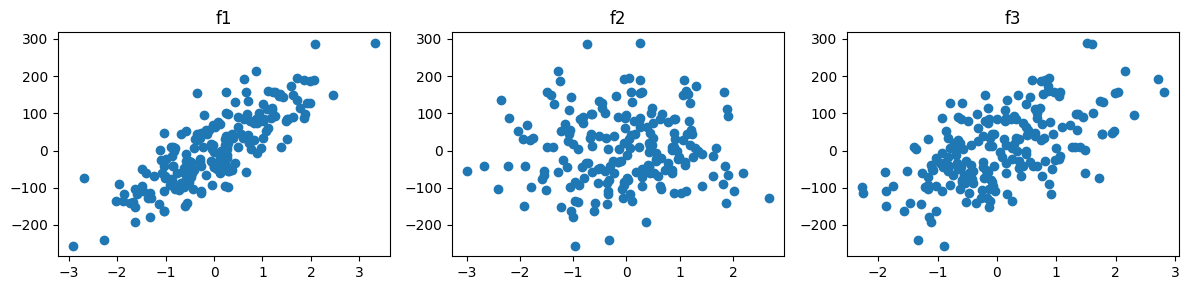

In [33]:
fig , (ax1 ,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,3))

ax1.scatter(df['feature1'],df['target'])
ax1.set_title("f1")
ax2.scatter(df['feature2'],df['target'])
ax2.set_title("f2")
ax3.scatter(df['feature3'],df['target'])
ax3.set_title("f3")

plt.tight_layout()
plt.show()

# 2.Multicollinearity

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[]

for i in range(X.shape[1]):
  vif.append(variance_inflation_factor(X,i))

pd.DataFrame({'vif':vif},index=X.columns).T
# if this is greater then 5 then there is a corelation

,feature1,feature2,feature3
vif,1.002545,1.00341,1.005937


<Axes: >

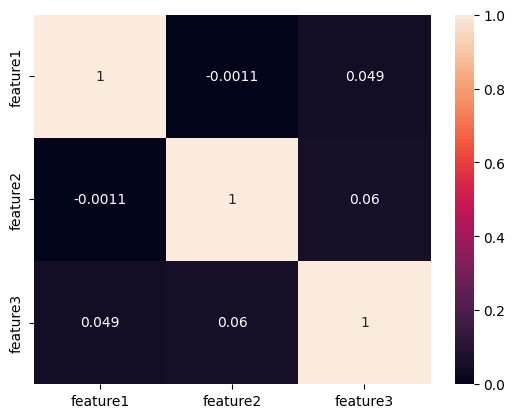

In [35]:
# heat map 2 method

sns.heatmap(X.corr(),annot=True)

# 3. Normal Residual

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

resd=y_test-y_pred

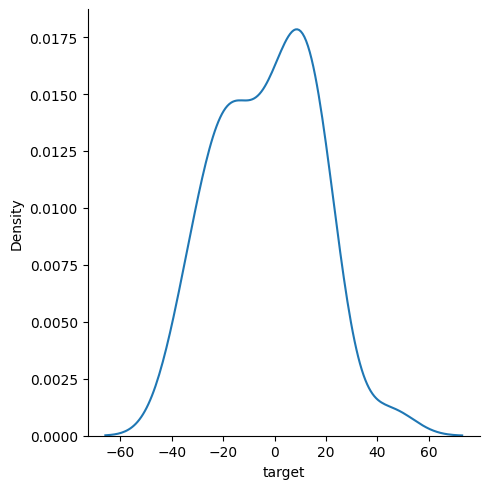

In [37]:
sns.displot(resd,kind='kde')   # it must be normally distrubuted

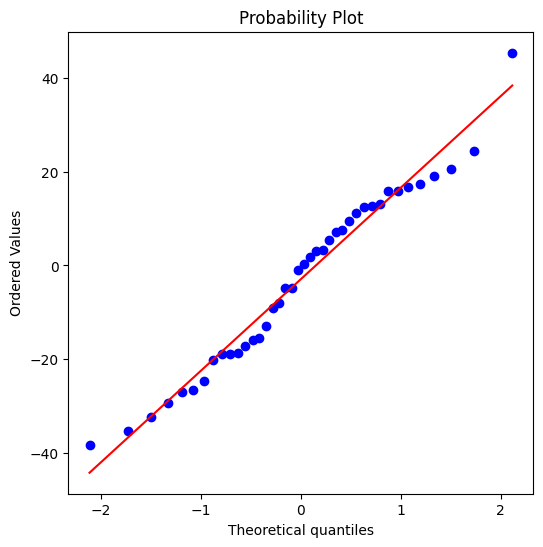

In [38]:
# QQ plot

import scipy as sp

fig , ax = plt.subplots(figsize=(6,6))
sp.stats.probplot(resd,plot=ax)
plt.show()

# 4. Homoscedasticity

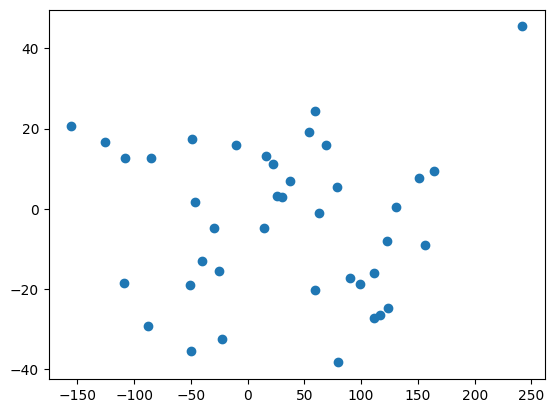

In [39]:
plt.scatter(y_pred,resd) # it must be spred not conserve

# 5. No Autocorrelation of Error

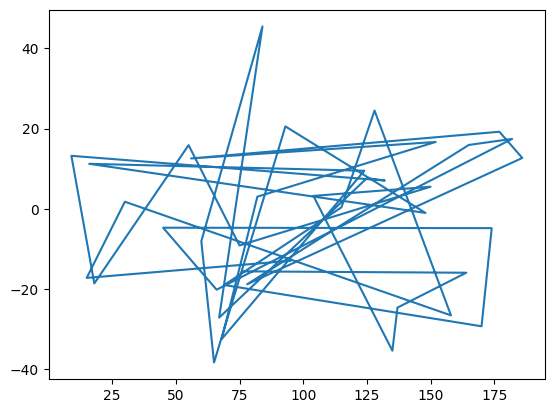

In [40]:
plt.plot(resd) # it must be random or zig zag